Sampling - Metropolis

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

A program to study Metropolis sampling technique. A mixture of Gaussian function is to be sampled from.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gaussian(x, mu, sig):
    '''
    returns the gaussian function given the x, mu and sig values.
    '''
    return 1./(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)


In [8]:
# setting percentage to sample
while True:
    try:
        # get input
        pct = float(input('Enter percentage to sample: '))
        break
    except Exception as e:
        print(e)
        print('Enter positive percentage!')


Enter percentage to sample:  67


In [9]:
# x values between -6 and 6 broken into 10000 points
x_values = np.linspace(-6, 6, 10000)
# mixture of Gaussian function
y_values = gaussian(x_values, 0, 2) + \
    gaussian(x_values, 1, 1) + \
    gaussian(x_values, -2, 0.5) + \
    gaussian(x_values, 0.5, 0.5)

# number of points to sample
n_pts = 10000 * pct/100


In [10]:
# sampled points placeholder
x_sampled = np.empty([0], dtype=float)

# continue sampling until the desired cnt value is reached
while len(x_sampled) < n_pts:

    # if x_sampled is size 0, then sample a random entry from x_values
    # else obtain the last sampled entry
    if len(x_sampled) == 0:  # empty array
        j_org = np.random.choice(x_values)
    else:
        j_org = x_sampled[-1]

    # now sample a candidate from a Gaussian around the j_samp with a
    # arbitrary standard deviation of 1
    j_dst = np.random.normal(j_org, 1)

    num = gaussian(j_dst, 0, 2) + \
        gaussian(j_dst, 1, 1) + \
        gaussian(j_dst, -2, 0.5) + \
        gaussian(j_dst, 0.5, 0.5)

    den = gaussian(j_org, 0, 2) + \
        gaussian(j_org, 1, 1) + \
        gaussian(j_org, -2, 0.5) + \
        gaussian(j_org, 0.5, 0.5)

    ratio = num/den

    j_acc_prob = np.random.rand()

    if ratio >= j_acc_prob:  # accept the new sample
        x_sampled = np.append(x_sampled, j_dst)
    else:  # keep the old sample
        x_sampled = np.append(x_sampled, j_org)


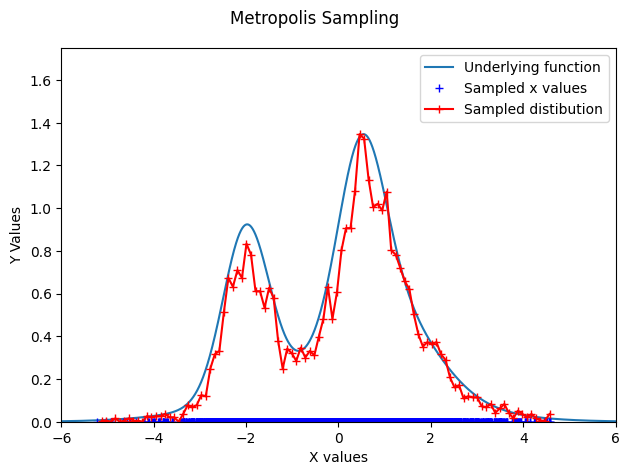

In [11]:
# plotting the graph
fig, (ax) = plt.subplots(1, 1)
fig.suptitle('Metropolis Sampling')

ax.plot(x_values, y_values, label='Underlying function')
ax.plot(x_sampled, np.zeros(x_sampled.shape), 'b+',
        label='Sampled x values')

counts, bins = np.histogram(x_sampled, bins=100)
rat = np.max(counts)/np.max(y_values)
ax.plot(bins[1:], counts/rat, 'r+-', label='Sampled distibution')
ax.set_ylabel('Y Values')
ax.set_xlabel('X values')
ax.set_xlim([-6, 6])
ax.set_ylim([0, 1.75])
ax.legend()

plt.tight_layout()
plt.show()